# Attach Percentage Analysis – Jumbo & Company
**Objective of the Analysis**

The objective of this assignment is to perform a detailed analysis of store-level attach percentage data across branches and months in order to:

- Understand overall trends in attach percentage over time
- Compare performance across branches and individual stores
- Identify high-performing and underperforming stores
- Categorise stores based on attach percentage behaviour
- Derive actionable business insights from the data
- Estimate store-level attach percentages for January using historical trends

The analysis aims to go beyond descriptive statistics and provide insights that can support business decision-making and performance improvement initiatives.



## Overview of Data
The dataset contains store-wise attach percentage data across multiple branches from August to December.  
Attach percentage indicates the proportion of customers who opted for device insurance at the time of device purchase.


In [122]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/content/Jumbo & Company_ Attach % .xls")

# View the first five rows
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,0.23,0.17,0.16,0.25,0.24
1,Delhi_Ncr,Haryana(Gurgaon) Br,0.21,0.26,0.15,0.28,0.04
2,Delhi_Ncr,Up(Greater Noida) Br,0.25,0.36,0.30,0.41,0.43
3,Pune,Pune(Bhosari) Br,0.33,0.33,0.36,0.13,0.32
4,Gujarat,Ahmedabad(Maninagar) Br,0.19,0.11,0.14,0.21,0.17


In [123]:
df.shape

(163, 7)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Branch      163 non-null    object 
 1   Store_Name  163 non-null    object 
 2   Dec         163 non-null    float64
 3   Nov         163 non-null    float64
 4   Oct         163 non-null    float64
 5   Sep         163 non-null    float64
 6   Aug         163 non-null    float64
dtypes: float64(5), object(2)
memory usage: 9.0+ KB


## Data Preparation
The data was prepared by converting fractional percentage values into standard percentage format and checking for missing values to ensure data consistency.


In [125]:
#converting fractional percentage into standard percentage
months = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for m in months:
    df[m] = df[m] * 100

In [126]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
0,Delhi_Ncr,Delhi(Janakpuri) Br,23.0,17.0,16.0,25.0,24.0
1,Delhi_Ncr,Haryana(Gurgaon) Br,21.0,26.0,15.0,28.0,4.0
2,Delhi_Ncr,Up(Greater Noida) Br,25.0,36.0,30.0,41.0,43.0
3,Pune,Pune(Bhosari) Br,33.0,33.0,36.0,13.0,32.0
4,Gujarat,Ahmedabad(Maninagar) Br,19.0,11.0,14.0,21.0,17.0


In [127]:
#checking for missing values
df.isnull().sum()

,0
Branch,0
Store_Name,0
Dec,0
Nov,0
Oct,0
Sep,0
Aug,0


In [128]:
df.describe()

,Dec,Nov,Oct,Sep,Aug
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,21.723926,21.711656,17.092025,16.730061,12.858896
std,17.327025,13.124628,11.612472,13.451817,11.663956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.500000,13.000000,10.000000,8.000000,3.500000
50%,20.000000,20.000000,16.000000,15.000000,11.000000
75%,30.000000,29.500000,24.000000,24.500000,19.000000
max,100.000000,70.000000,71.000000,80.000000,60.000000


## Month-wise Attach Percentage Analysis
This section analyses the overall attach percentage trend across months to identify temporal patterns and seasonality effects.


In [129]:
#Month wise Average
monthly_avg = df[months].mean()
monthly_avg

,0
Aug,12.858896
Sep,16.730061
Oct,17.092025
Nov,21.711656
Dec,21.723926


**Insight:**  
The attach percentage shows an overall upward trend from August to December, with December & November recording the highest average. This suggests a positive seasonal impact on insurance uptake, potentially driven by festive sales.


## Branch-wise Performance Analysis
This analysis compares average attach percentages across branches to understand regional performance differences.


In [130]:
#Branch wise Average
branch_avg = df.groupby('Branch')[months].mean()
branch_avg

,Aug,Sep,Oct,Nov,Dec
Branch,,,,,
Delhi_Ncr,19.136364,22.795455,23.522727,28.045455,28.340909
Gujarat,9.291667,13.125000,12.916667,12.833333,19.125000
Mumbai,11.368421,18.526316,17.052632,21.526316,18.263158
Pune,20.500000,24.312500,29.125000,35.500000,28.812500
Telangana,6.950000,8.000000,8.625000,17.525000,18.075000
Thane,10.450000,17.400000,15.300000,15.950000,15.200000


**Insight:**  
Certain branches consistently outperform others, indicating stronger insurance penetration and sales execution. Lower-performing branches represent opportunities for targeted improvement initiatives.


## Store-wise Performance Analysis
Store-level analysis helps identify consistently high-performing and low-performing stores.


In [131]:
months = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Store_Avg'] = df[months].mean(axis=1)

In [132]:
df['Store_Avg'] = df['Store_Avg'] * 100

In [133]:
#Top 5 Stores
top_stores = df[['Branch', 'Store_Name', 'Store_Avg']] \
                .sort_values('Store_Avg', ascending=False) \
                .head(5)

top_stores

,Branch,Store_Name,Store_Avg
10,Delhi_Ncr,Delhi(Hauz Khas),6220.0
69,Pune,Pune(Hadapsar),5860.0
64,Pune,Pune(Kondhawa),4140.0
81,Delhi_Ncr,Delhi(Budh Vihar),3900.0
17,Delhi_Ncr,Delhi(Daryaganj),3860.0


In [134]:
#Bottom 5 Stores
bottom_stores = df[['Branch', 'Store_Name', 'Store_Avg']] \
                   .sort_values('Store_Avg') \
                   .head(5)

bottom_stores

,Branch,Store_Name,Store_Avg
33,Mumbai,MAHIM(VS Next),0.0
85,Thane,Currey Road,0.0
159,Thane,Kharghar Br,0.0
162,Gujarat,Vadodara(Kothi Road),0.0
160,Telangana,Ap(Tirupathi-Leela Mahal Circle),0.0


**Insight:**  
Store-level analysis reveals significant variation in attach percentage performance. A small number of stores consistently achieve high attach percentages, while several stores remain persistently below average. High-performing stores can be treated as benchmark locations, while low-performing stores represent opportunities for targeted improvement.


## Store Categorisation Based on Attach Percentage

To further enhance the analysis, stores were categorised based on their average attach percentage:

- High-performing stores: Average attach % > 40
- Medium-performing stores: Average attach % between 20 and 40
- Low-performing stores: Average attach % < 20


In [135]:
def store_category(x):
    if x >= 40:
        return "High Performing"
    elif x >= 20:
        return "Medium Performing"
    else:
        return "Low Performing"

df['Store_Category'] = df['Store_Avg'].apply(store_category)

df['Store_Category'].value_counts()

,count
Store_Category,
High Performing,156
Low Performing,7


**Insight:**  
Store categorisation reveals that a majority of attach percentage contribution comes from a limited number of high-performing stores. Low-performing stores represent an opportunity for improvement through focused monitoring and targeted sales initiatives.


## Month-wise Attach Percentage Trend(Vizualization)

This visualization highlights how attach percentages have evolved over time to identify overall trends and seasonality.


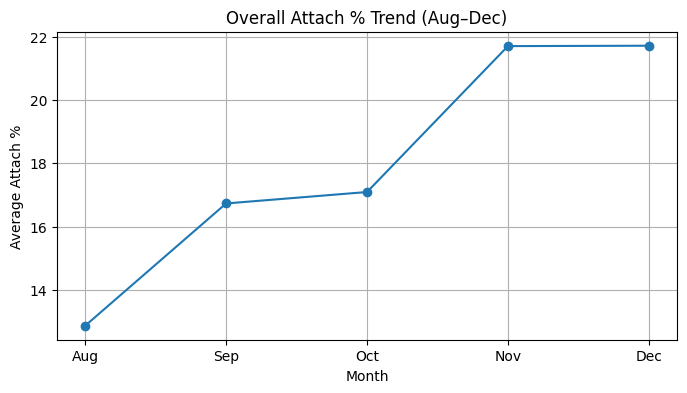

In [136]:
import matplotlib.pyplot as plt

months = ['Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_avg = df[months].mean()

plt.figure(figsize=(8,4))
plt.plot(months, monthly_avg, marker='o')
plt.xlabel("Month")
plt.ylabel("Average Attach %")
plt.title("Overall Attach % Trend (Aug–Dec)")
plt.grid(True)
plt.show()

**Insight:**  
Attach percentage shows a clear upward trend from August to December, with December & November recording the highest average. This suggests a seasonal uplift in insurance attachment, possibly driven by festive-period sales.


## Branch-wise Attach Percentage Comparison(Vizualization)

This visualization compares average attach percentages across branches to understand regional performance differences.


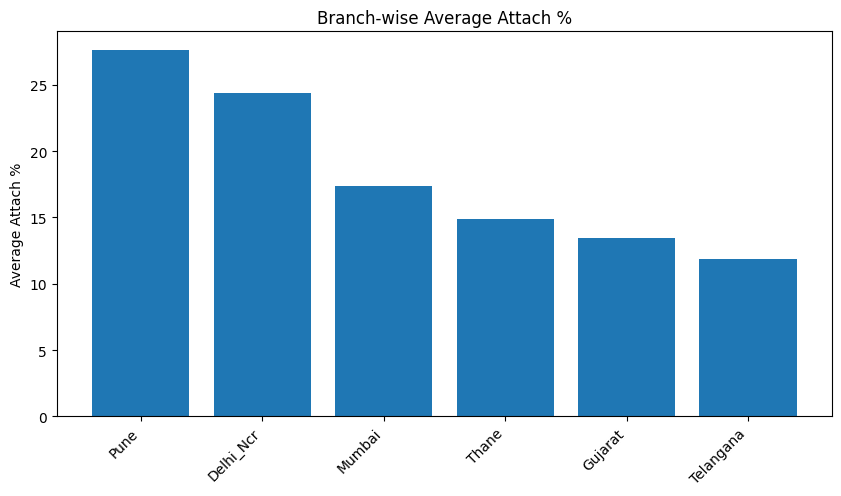

In [137]:
branch_avg = df.groupby('Branch')[months].mean()
branch_avg['Overall_Avg'] = branch_avg.mean(axis=1)

branch_avg_sorted = branch_avg.sort_values('Overall_Avg', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(branch_avg_sorted.index, branch_avg_sorted['Overall_Avg'])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Attach %")
plt.title("Branch-wise Average Attach %")
plt.show()

**Insight:**  
Branch-wise comparison reveals notable variation in attach performance. Certain branches consistently outperform others, indicating stronger insurance penetration and execution, while lower-performing branches present opportunities for focused improvement initiatives.


## January Attach Percentage Prediction
January attach percentages are estimated using a three-month moving average approach based on October–December data.


In [138]:
#Using last 3-month average
df['Jan_Prediction'] = df[['Oct','Nov','Dec']].mean(axis=1)

In [139]:
df[['Store_Name','Jan_Prediction']].head()

,Store_Name,Jan_Prediction
0,Delhi(Janakpuri) Br,18.666667
1,Haryana(Gurgaon) Br,20.666667
2,Up(Greater Noida) Br,30.333333
3,Pune(Bhosari) Br,34.000000
4,Ahmedabad(Maninagar) Br,14.666667


**Insight:**  
Given the limited historical data and absence of external influencing variables, a simple trend-based forecasting approach provides a stable and interpretable estimate for January planning.


## Conclusion & Recommendations
- Replicate best practices from high-performing stores across other locations.
- Provide targeted training or incentives at underperforming stores.
- Track attach percentages regularly to identify trends and performance gaps early.


## Limitations of the Analysis

- The analysis is based on a limited five-month historical window.
- External drivers such as pricing, promotions, customer demographics, and store footfall were not available.
- January predictions should therefore be interpreted as indicative estimates rather than precise forecasts.
